In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal

In [16]:
# Load cleaned data
benin_df = pd.read_csv("../data/benin_clean.csv")
sierraleone_df = pd.read_csv("../data/sierraleone_clean.csv")
togo_df = pd.read_csv("../data/togo_clean.csv")

# Ensure Timestamp column is in datetime format
for df in [benin_df, sierraleone_df, togo_df]:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Define daytime filter (6 AM to 6 PM)
def filter_daytime_hours(df):
    df['Hour'] = df['Timestamp'].dt.hour
    return df[(df['Hour'] >= 6) & (df['Hour'] <= 18)].copy()  

# Apply filter
benin_df = filter_daytime_hours(benin_df)
sierraleone_df = filter_daytime_hours(sierraleone_df)
togo_df = filter_daytime_hours(togo_df)

# Add country labels
benin_df['Country'] = 'Benin'
sierraleone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Combine dataframes
combined_df = pd.concat([benin_df, sierraleone_df, togo_df], ignore_index=True)


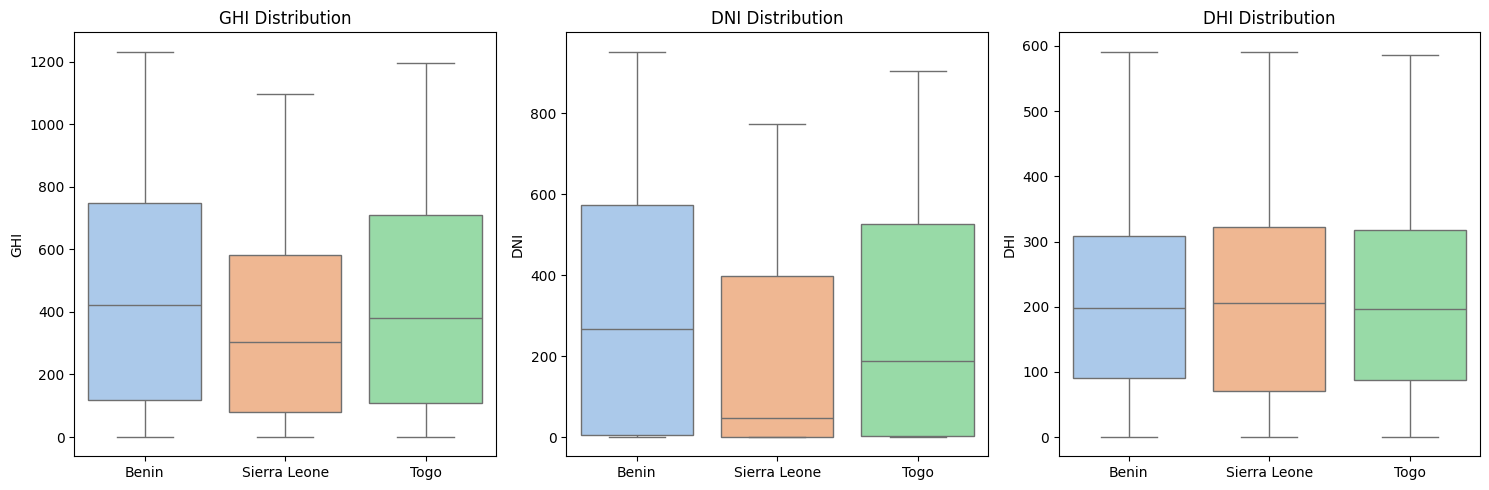

In [17]:
# Boxplot for GHI, DNI, and DHI
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Country', y=metric, data=combined_df, palette='pastel', hue=combined_df['Country'])
    plt.title(f'{metric} Distribution')
    plt.xlabel('')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()


In [18]:
# summary statistics for each country
summary_benin = benin_df[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary_sierraleone = sierraleone_df[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary_togo = togo_df[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)

# Combine summaries into a single DataFrame for better comparision
summary_combined = pd.concat({
    'Benin': summary_benin,
    'Sierra Leone': summary_sierraleone,
    'Togo': summary_togo
}, axis=1)

# display the summary statistics
print("Summary Statistics for GHI, DNI, and DHI:")
summary_combined


Summary Statistics for GHI, DNI, and DHI:


Benin                 Sierra Leone                    Togo          \
           GHI     DNI     DHI          GHI     DNI     DHI     GHI     DNI   
mean    441.59  310.62  210.53       353.70  196.71  208.86  419.37  275.79   
median  422.50  267.80  197.70       304.00   47.60  206.10  382.30  187.60   
std     330.10  287.95  149.62       293.72  240.70  151.46  324.34  281.25   

                
           DHI  
mean    210.13  
median  196.40  
std     149.59

In [19]:
# Extract GHI values for each country
ghi_benin = benin_df['GHI']
ghi_sierraleone = sierraleone_df['GHI']
ghi_togo = togo_df['GHI']

# One-Way ANOVA Test
anova_stat, anova_p = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)

print(f"ANOVA p-value: {anova_p:.5f}")
if anova_p < 0.05:
    print("Significant differences in GHI between countries (p < 0.05)")
else:
    print("No significant differences in GHI (p >= 0.05)")


ANOVA p-value: 0.00000
Significant differences in GHI between countries (p < 0.05)


In [20]:
# kruskal-wallis test
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_sierraleone, ghi_togo)

print(f"Kruskal-Wallis p-value: {kruskal_p:.5f}")
if kruskal_p < 0.05:
    print("Significant differences in GHI between countries (p < 0.05)")
else:
    print("No significant differences in GHI (p >= 0.05)")


Kruskal-Wallis p-value: 0.00000
Significant differences in GHI between countries (p < 0.05)


### Key Observations

* **Benin** shows the **highest median GHI (422.50)** and **highest mean DNI (310.62)** among the three, indicating strong and relatively consistent solar irradiance. This suggests **favorable conditions for solar energy** generation.

* **Sierra Leone** has the **lowest median DNI (47.60)**, implying **significantly lower direct sunlight** exposure—possibly due to persistent cloud cover. Interestingly, it still maintains a **moderate median DHI (206.10)**, which supports this interpretation as diffuse light increases with cloudiness.

* **Togo** exhibits **moderate solar irradiance levels** but has the **highest variability in DNI (std = 281.25)** and **substantial GHI fluctuation (std = 324.34)**. This suggests **less predictability** in solar availability, which could affect planning and reliability for solar energy systems.


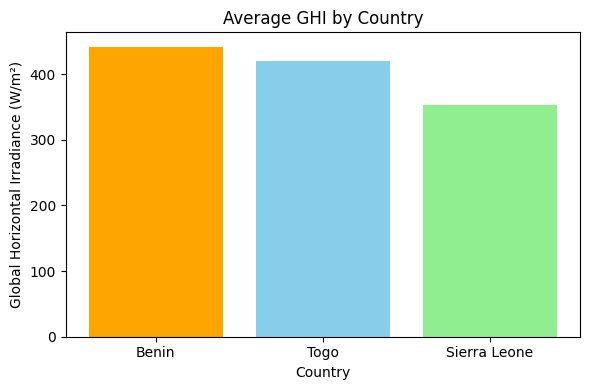

In [21]:
# Calculate average GHI for each country
avg_ghi = {
    "Benin": summary_benin["GHI"]["mean"],
    "Sierra Leone": summary_sierraleone["GHI"]["mean"],
    "Togo": summary_togo["GHI"]["mean"]
}

# Sort countries by average GHI
sorted_avg_ghi = dict(sorted(avg_ghi.items(), key=lambda item: item[1], reverse=True))

# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(sorted_avg_ghi.keys(), sorted_avg_ghi.values(), color=["orange", "skyblue", "lightgreen"])
plt.title("Average GHI by Country")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()